<a href="https://colab.research.google.com/github/Quimexo/Diplo/blob/main/Entregable_%C3%BAnico_Aprendizaje_No_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico entregable Aprendizaje No Supervisado

Georgina Flesia -- Laura Alonso Alemany



Utilizar la base de jugadores “female_players.csv” disponible en la página de Kaggle https://www.kaggle.com/datasets/stefanoleone992/fifa-23-complete-player-dataset . Consideren que en comparación con la base vista en clase, esta base no tiene los mismos jugadores (ahora mujeres 2023) y no tiene exactamente el mismo formato (a los nombres de las variables se les agregó una keyword para identificar a qué tipo de habilidad corresponde).

Con la nueva base, realizar el siguiente análisis. Notar que es más completo pero análogo al que realizamos con los datos FIFA2019 en el cursado de la materia.

Cada seccion debe ser comentada con celdas de texto. Elijan la visualización que dé mas información sobre los datos.



In [24]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
from sklearn.preprocessing import StandardScaler


In [2]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

1- Análisis exploratorio inicial de la base.



In [3]:
url='https://raw.githubusercontent.com/Quimexo/Diplo/main/female_players.csv'

In [4]:
#url='https://raw.githubusercontent.com/DiploDatos/AprendizajeNOSupervisado/master/2024/Fifa2019/data2019.cs'

In [5]:
df=pd.read_csv(url)
df.head(5)

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,227125,/player/227125/sam-kerr/230009,23,9,2023-01-13,S. Kerr,Samantha May Kerr,ST,91,91,134500000.0,4000.0,28,1993-09-10,168,66,2216.0,Women's Super League,1.0,116010.0,Chelsea W,ST,20.0,NaN,2020-01-01,2024.0,195,Australia,NaN,NaN,NaN,Right,4,4,5,High/High,Normal (170-),Yes,275700000.0,"#Aerial Threat, #Dribbler, #Engine, #Distance ...","Solid Player, Leadership, Finesse Shot, Speed ...",87.0,91.0,74.0,90.0,42.0,83.0,70,93,91,...,91,82,91,91,87,86,89,70,24,95,79,75,92.0,44,39,30,7,12,8,16,13,NaN,91,91,91,87,89,89,89,87,86+3,86+3,86+3,85+3,78+3,78+3,78+3,85+3,64+3,62+3,62+3,62+3,64+3,61+3,58+3,58+3,58+3,61+3,20+3,https://cdn.sofifa.net/players/227/125/23_120.png
1,227316,/player/227316/wendie-renard/230009,23,9,2023-01-13,W. Renard,Wéndèleine Thérèse Renard,CB,91,91,89500000.0,3000.0,31,1990-07-20,187,70,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,LCB,3.0,NaN,2006-07-01,2026.0,18,France,113003.0,LCB,3.0,Right,3,2,5,High/Medium,Lean (185+),Yes,183500000.0,"#Aerial Threat, #Tackling, #Tactician, #Streng...","Leadership, Long Passer (AI), Power Header, Te...",63.0,72.0,71.0,72.0,93.0,87.0,51,70,96,...,90,34,85,86,75,93,65,88,90,70,59,75,84.0,93,94,91,7,14,17,11,15,NaN,78+3,78+3,78+3,71,75,75,75,71,74+3,74+3,74+3,72+3,79+3,79+3,79+3,72+3,80+3,87+3,87+3,87+3,80+3,82+3,91,91,91,82+3,21+3,https://cdn.sofifa.net/players/227/316/23_120.png
2,226301,/player/226301/alex-morgan/230009,23,9,2023-01-13,A. Morgan,Alexandra Morgan Carrasco,ST,90,90,NaN,NaN,32,1989-07-02,168,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,United States,113009.0,ST,13.0,Left,4,4,5,High/Low,Unique,Yes,NaN,#Clinical Finisher,"Leadership, Finesse Shot, Flair, Speed Dribble...",89.0,91.0,80.0,88.0,47.0,77.0,71,95,86,...,84,67,90,81,87,81,83,53,46,92,75,88,92.0,41,43,39,11,11,10,10,11,NaN,90,90,90,87,89,89,89,87,87+3,87+3,87+3,86+3,82+3,82+3,82+3,86+3,69+3,67+3,67+3,67+3,69+3,66+3,60+3,60+3,60+3,66+3,19+3,https://cdn.sofifa.net/players/226/301/23_120.png
3,227310,/player/227310/ada-hegerberg/230009,23,9,2023-01-13,A. Hegerberg,Ada Martine Stolsmo Hegerberg,ST,90,91,143000000.0,3000.0,26,1995-07-10,176,68,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,RES,14.0,NaN,2014-07-01,2024.0,36,Norway,113007.0,ST,14.0,Right,4,4,5,High/Medium,Normal (170-185),Yes,303900000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Leadership, Outside Foot Shot, Technical Dribb...",83.0,91.0,77.0,87.0,39.0,77.0,71,94,93,...,92,47,86,89,75,81,89,65,23,96,76,86,86.0,42,33,30,15,7,12,10,14,NaN,90+1,90+1,90+1,87,89,89,89,87,87+3,87+3,87+3,85+3,78+3,78+3,78+3,85+3,63+3,61+3,61+3,61+3,63+3,60+3,56+3,56+3,56+3,60+3,20+3,https://cdn.sofifa.net/players/227/310/23_120.png
4,227246,/player/227246/lucy-bronze/230009,23,9,2023-01-13,L. Bronze,Lucia Roberta Tough Bronze,RB,89,89,NaN,NaN,30,1991-10-28,171,6

In [6]:
df.shape

(181361, 110)

In [7]:
df.columns

Index(['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'fifa_update_date', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk',
       'player_face_url'],
      dtype='object', length=110)

In [8]:
print(df.columns.tolist())

['player_id', 'player_url', 'fifa_version', 'fifa_update', 'fifa_update_date', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'league_id', 'league_name', 'league_level', 'club_team_id', 'club_name', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_sp

In [9]:
# Verificamos si hay filas duplicadas...
duplicados = df.duplicated()
df_duplicados = df[duplicados]
df_duplicados

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url


In [10]:

#Panorama rápido del dataset
df.describe(include='all')

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
count,181361.000000,181361,181361.000000,181361.000000,181361,181361,181361,181361,181361.000000,181361.000000,4.831000e+03,4831.000000,181361.000000,181361,181361.000000,181361.000000,4876.000000,4876,4785.0,4876.000000,4876,4876,4876.000000,81,4704,4785.000000,181361.000000,181361,177364.000000,177364,177364.000000,181361,181361.000000,181361.000000,181361.000000,181361,181361,181361,4.750000e+03,30163,71768,158620.000000,158620.000000,158620.000000,158620.000000,158620.000000,158620.000000,181361.000000,181361.000000,181361.000000,...,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,165358.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,181361.000000,22734.000000,181361,181361,181361,181361,181361,181361,181361,181361,181361,181361,181361,181361,181361,181361,181361,181361,181361,181361,181361,181361,181361,181361,181361,181361,181361,181361,181361,181361
unique,NaN,181361,NaN,NaN,512,1690,1654,382,NaN,NaN,NaN,NaN,NaN,1387,NaN,NaN,NaN,3,NaN,NaN,35,27,NaN,6,222,NaN,NaN,54,NaN,30,NaN,2,NaN,NaN,NaN,9,9,2,NaN,113,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,279,279,279,191,203,203,203,191,298,298,298,283,257,257,257,283,274,287,287,287,274,274,295,295,295,274,137,4131
top,NaN,/player/227125/sam-kerr/230009,NaN,NaN,2022-09-28,L. Williams,Samantha May Kerr,GK,NaN,NaN,NaN,NaN,NaN,1988-02-29,NaN,NaN,NaN,Women's Super League,NaN,NaN,Lyon W,SUB,NaN,Manchester United W,2021-07-01,NaN,NaN,France,NaN,SUB,NaN,Right,NaN,NaN,NaN,Medium/Medium,Normal (170-),No,NaN,#Engine,Leadership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71+2,71+2,71+2,71,72,72,72,71,74+2,74+2,74+2,69+2,68+2,68+2,68+2,69+2,71+2,69+1,69+1,69+1,71+2,71+1,71+1,71+1,71+1,71+1,18+2,https://cdn.sofifa.net/players/227/112/17_120.png
freq,NaN,1,NaN,NaN,835,543,519,22735,NaN,NaN,NaN,NaN,NaN,2651,NaN,NaN,NaN,2428,NaN,NaN,252,2328,NaN,26,463,NaN,NaN,13300,NaN,92202,NaN,147173,NaN,NaN,NaN,94178,74951,112009,NaN,2982,7028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3511,3511,3511,8195,6708,6708,6708,8195,4111,4111,4111,4229,4162,4162,4162,4229,3502,3693,3693,3693,3502,3725,3140,3140,3140,3725,15184,99
mean,234662.993907,NaN,19.223538,36.727703,NaN,NaN,NaN,NaN,76.269909,79.672967,1.668368e+07,818.505485,26.014099,NaN,168.756464,61.213580,2215.473749,NaN,1.0,116009.965135,NaN,NaN,14.876743,NaN,NaN,2023.980564,69.767910,NaN,113079.558980,NaN,12.334437,NaN,3.009076,2.630395,1

In [11]:

df.dtypes


,0
player_id,int64
player_url,object
fifa_version,int64
fifa_update,int64
fifa_update_date,object
short_name,object
long_name,object
player_positions,object
overall,int64
potential,int64


In [12]:
# Control
faltantes=df.isnull().sum()
faltantes


,0
player_id,0
player_url,0
fifa_version,0
fifa_update,0
fifa_update_date,0
short_name,0
long_name,0
player_positions,0
overall,0
potential,0


In [13]:
# Contabilizamos todas las jugadoras
cont_jugadoras = df['player_id'].nunique()
print(f"El número de jugadoras es: {cont_jugadoras}")

El número de jugadoras es: 1635


In [14]:
print(df.overall)

0         91
1         91
2         90
3         90
4         89
          ..
181356    64
181357    64
181358    64
181359    63
181360    61
Name: overall, Length: 181361, dtype: int64


array([[<Axes: title={'center': 'player_id'}>,
        <Axes: title={'center': 'fifa_version'}>,
        <Axes: title={'center': 'fifa_update'}>,
        <Axes: title={'center': 'overall'}>,
        <Axes: title={'center': 'potential'}>,
        <Axes: title={'center': 'value_eur'}>,
        <Axes: title={'center': 'wage_eur'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'height_cm'}>,
        <Axes: title={'center': 'weight_kg'}>,
        <Axes: title={'center': 'league_id'}>,
        <Axes: title={'center': 'league_level'}>,
        <Axes: title={'center': 'club_team_id'}>,
        <Axes: title={'center': 'club_jersey_number'}>,
        <Axes: title={'center': 'club_contract_valid_until_year'}>,
        <Axes: title={'center': 'nationality_id'}>],
       [<Axes: title={'center': 'nation_team_id'}>,
        <Axes: title={'center': 'nation_jersey_number'}>,
        <Axes: title={'center': 'weak_foot'}>,
        <Axes: title={'center': 'skill_moves'}>,
   

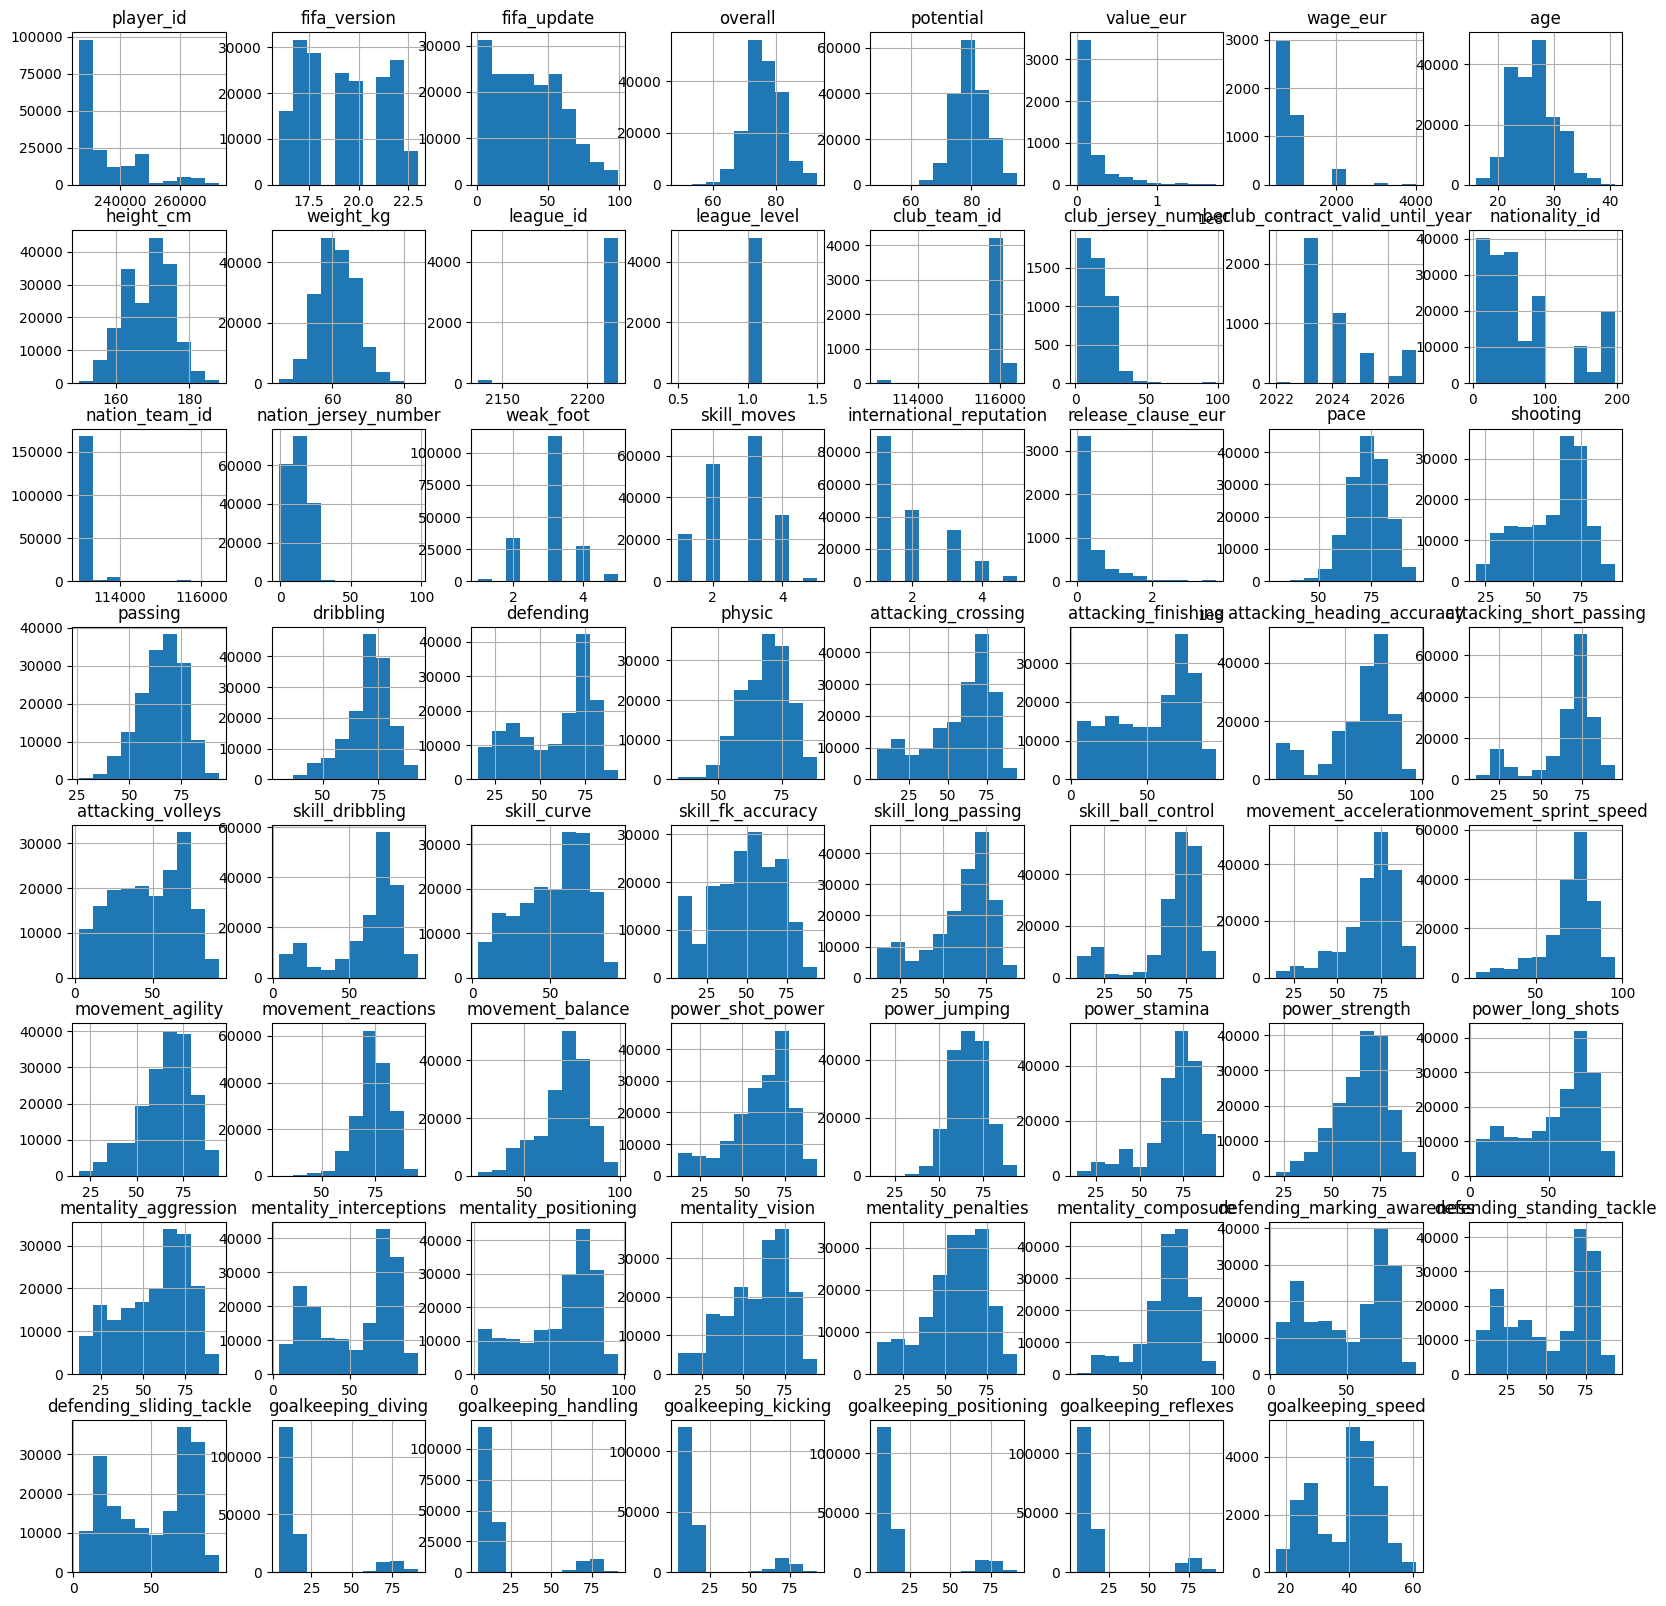

In [15]:
df.hist(figsize=(20, 20))  # Muestra histogramas para todas las variables numéricas.


In [16]:
cols_sel=['overall', 'potential', 'pace','shooting', 'passing','dribbling', 'defending']


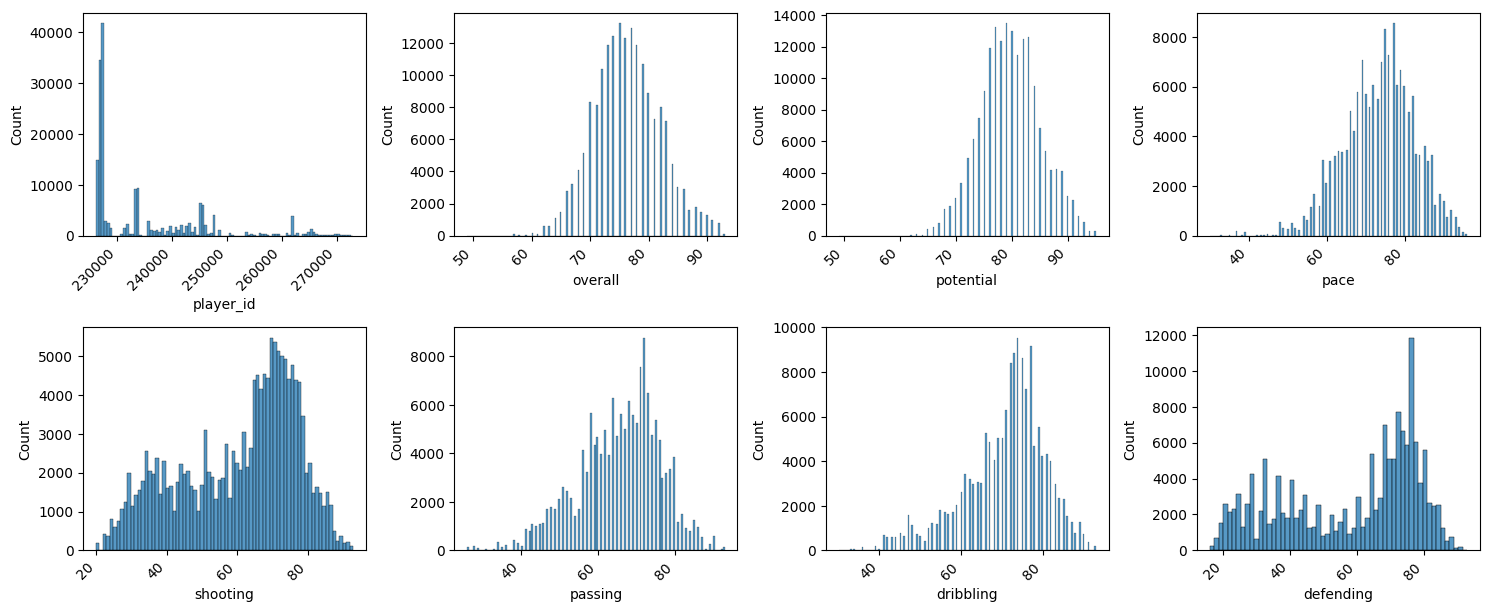

In [17]:

df_cols=df[cols_sel]

plt.figure(figsize=(15, 12), dpi=100)

for i, columna in enumerate(cols_sel, start=1):
    plt.subplot(4, 4, i)
    sns.histplot(data=df_cols, x=columna,) #sns.pairplot(df_base, hue='attendance', vars=numerical_vars)
    plt.tight_layout()
    plt.xticks(rotation=45, ha='right')

# 2- Evaluación visual e intuitiva de a dos variables numéricas por vez. Sugerencia: hagan los scatterplots de las combinaciones de dos variables que tengan algún sentido para ustedes, porque todas las combinaciones de variables son muchas y no van a poder analizarlas como merecen.




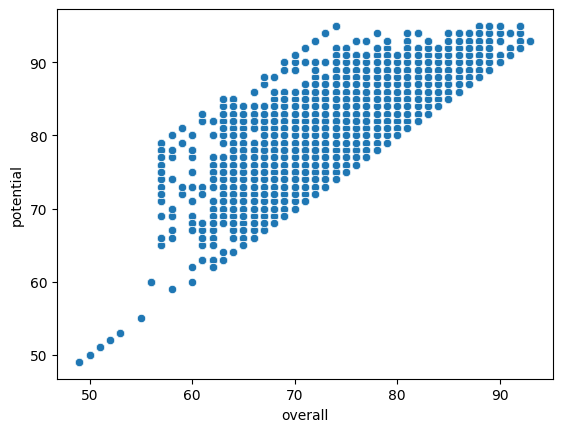

In [19]:
sns.scatterplot(x='overall', y='potential', data=df)
plt.show()

En el scatterplots entre Overall y potential, podemos indicar:
En la diagonal ascendente se encuentran jugadoras que tienen mismo potencial que puntaje.Pero por encima de esta diagonal, se encuntran jugadoras que tienen menos puntaje para el potencial que tienen.

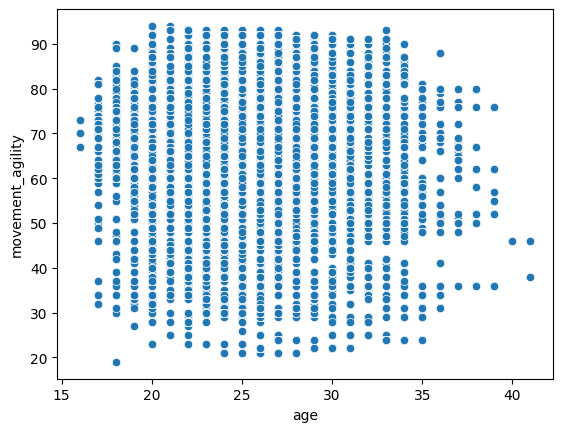

In [21]:
sns.scatterplot(x='age', y='movement_agility', data=df)
plt.show()

No se observa Relación en el scatterplot.Hay dispersion sin una relacion lineal

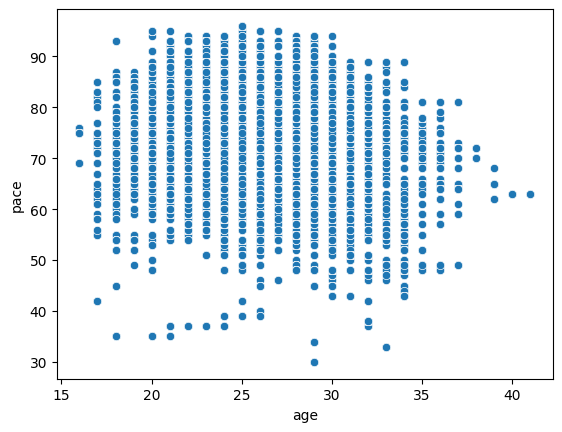

In [22]:
sns.scatterplot(x='age', y='pace', data=df)
plt.show()

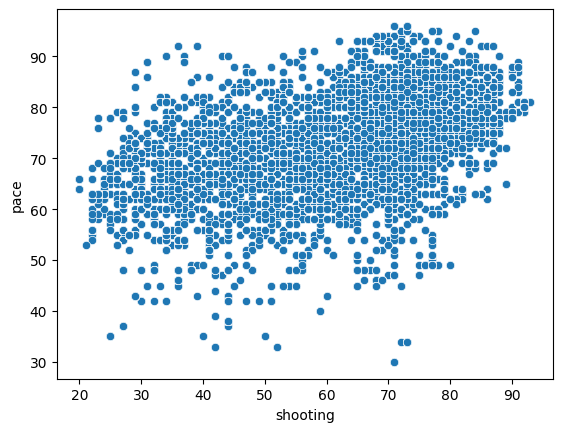

In [23]:

sns.scatterplot(x='shooting', y='pace', data=df)
plt.show()

# 3- Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ?



In [25]:
#Se realiza normalizacion para poder trabajar con el punto siguiente:

cluster_vars = ['overall', 'potential', 'pace', 'shooting', 'passing', 'dribbling', 'defending']

df_cluster = df[cluster_vars].dropna()

In [26]:
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

In [ ]:
#PENDIENTE.
#Debo trabajar sobre los valores nulos de las columnas elegidas---> hacer imputacion, si no al hcer cluster es un problema

# 4- Aplicación de clustering para encontrar grupos de jugadoras con habilidades equivalentes, por ejemplo, jugadoras que podrían intercambiarse en el caso de una lesión o cuando una jugadora está cansada. Para esto utilice como mínimo dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Justifiquen por qué eligen los diferentes hiper-parámetros que se puedan elegir según el método: número de clusters, medida de distancia, criterio de aglomeración…



In [ ]:
# Debo filtrar las columnas que me interesan
# Debo normalizar antes (todo misma escala)--->punto de arriba

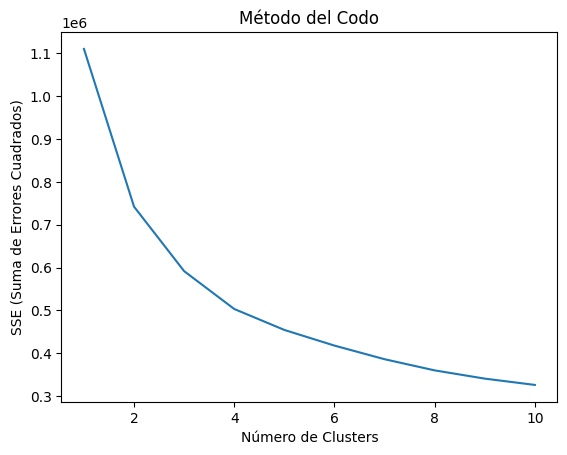

In [27]:
# 3. K-Means Clustering:
# Determinar el número óptimo de clusters usando el método del codo
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('Número de Clusters')
plt.ylabel('SSE (Suma de Errores Cuadrados)')
plt.title('Método del Codo')
plt.show()


In [28]:
kmeans = KMeans(n_clusters=5, random_state=42)  # Ajusta el número de clusters según el resultado del método del codo
df['kmeans_cluster'] = kmeans.fit_predict(df_cluster_scaled)
# d REVISAR PORQUE AL NO TRABAJAR SOBRE LOS NULOS, la cantidad de cada df es diferente por eso el error.
#arriba hago drop pero estaria mal porque lo mejor seria imputar los valores faltantes con la media de cada uno

ValueError: Length of values (158620) does not match length of index (181361)

5- Análisis cualitativo de los clusters encontrados. ¿Qué hay en cada cluster? ¿Son efectivamente equivalentes las jugadoras de un cluster, es decir, podrían cumplir el mismo rol en un equipo? Si se trata de clusters heterogéneos, ¿por qué razón pueden haber sido agrupadas las jugadoras del cluster? ¿Qué motiva las diferencias en tamaño?



6- Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.